In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#import the data CSV file

online_sales_data = pd.read_csv('Online Shop Customer Sales Data.csv')
online_sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [3]:
online_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


#### Data Preparation and Manipulation

In [4]:
#Replace Gender binary format of 0 and 1 to text of Male and Female

online_sales_data['Gender'] = online_sales_data['Gender'].replace({0: 'Male', 1: 'Female'})

online_sales_data['Pay_Method'] = online_sales_data['Pay_Method'].replace({0: 'Digital Wallets', 1: 'Card', 2: 'Paypal', 3: 'Other'})

online_sales_data['Browser'] = online_sales_data['Browser'].replace({0: 'Chrome', 1: 'Safari', 2: 'Edge', 3: 'Other'})

online_sales_data['Newsletter'] = online_sales_data['Newsletter'].replace({0: 'Unsubscribed', 1: 'Subscribed'})

online_sales_data['Voucher'] = online_sales_data['Voucher'].replace({0: 'Not Used', 1: 'Used'})

online_sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,Unsubscribed,Not Used
1,504309,18,Female,36.2,3,10.12.21,2.896,Paypal,656,Chrome,Unsubscribed,Used
2,504310,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used
3,504311,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,Subscribed,Not Used
4,504312,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,Subscribed,Not Used


In [5]:
#Reinspect the data info

online_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  object 
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  object 
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  object 
 10  Newsletter      65796 non-null  object 
 11  Voucher         65796 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 6.0+ MB


In [6]:
#Convert the Purchase_DATE data to date format

online_sales_data['Purchase_DATE'] = pd.to_datetime(online_sales_data['Purchase_DATE'])
online_sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Unsubscribed,Not Used
1,504309,18,Female,36.2,3,2021-10-12,2.896,Paypal,656,Chrome,Unsubscribed,Used
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used


In [7]:
#Understading the customer demographies

# Calculate the number of unique customers
n_customers = len(online_sales_data["Customer_id"].unique())

# Calculate the average age and gender distribution
avg_age = online_sales_data["Age"].mean()
gender_dist = online_sales_data["Gender"].value_counts(normalize=True).mul(100).round(2)
gender_count = online_sales_data["Gender"].value_counts()

# Print the results
print("Number of unique customers:", n_customers)
print("Average age:", avg_age)
print("Gender distribution:")
print(gender_dist)
print("Gender count percentage")
print(gender_count)

Number of unique customers: 65796
Average age: 39.592695604596024
Gender distribution:
Female    67.13
Male      32.87
Name: Gender, dtype: float64
Gender count percentage
Female    44172
Male      21624
Name: Gender, dtype: int64


In [8]:
# Group the data by age and calculate the average purchase value
age_groups = online_sales_data.groupby("Age")
avg_purchase_value = age_groups["Purchase_VALUE"].mean()

# Print the results
print("Average purchase value by age:")
print(avg_purchase_value)

Average purchase value by age:
Age
16    15.760909
17    15.485740
18    15.964038
19    16.229575
20    16.146978
21    16.028609
22    15.853730
23    15.779455
24    16.404679
25    15.913397
26    15.752133
27    15.255778
28    15.805347
29    15.739020
30    16.075355
31    15.602974
32    16.371191
33    15.166430
34    15.946664
35    15.407703
36    16.098879
37    15.977038
38    15.963722
39    16.439584
40    16.082139
41    16.139935
42    16.425706
43    15.511537
44    15.712805
45    15.942283
46    16.502921
47    15.996379
48    15.827248
49    16.026853
50    15.589208
51    16.144233
52    16.974722
53    15.530213
54    16.164832
55    16.093937
56    15.750357
57    16.492334
58    15.564992
59    16.247608
60    16.167114
61    16.549603
62    16.068209
63    15.778880
Name: Purchase_VALUE, dtype: float64


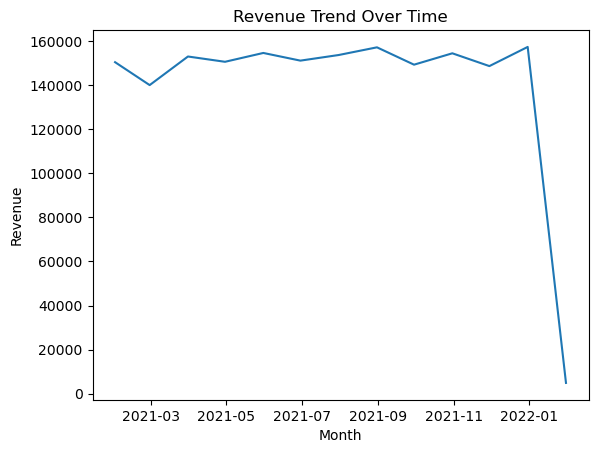

In [9]:
#### Find revenue trends over time

# Group the data by month and calculate the total revenue
monthly_revenue = online_sales_data.groupby(pd.Grouper(key="Purchase_DATE", freq="M"))["Revenue_Total"].sum()

# Plot the revenue trend over time
plt.plot(monthly_revenue)
plt.title("Revenue Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#### Customer Segmentation Analysis

In [10]:

# Drop rows with missing values
online_sales_data = online_sales_data.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(online_sales_data[['Age', 'Revenue_Total', 'N_Purchases', 'Purchase_VALUE']])

# Fit KMeans clustering algorithm to identify customer segments
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_data)

# Add the cluster labels to the original DataFrame
online_sales_data['Cluster'] = kmeans.labels_

# View the customer segments
print(online_sales_data.groupby('Cluster').mean())


           Customer_id        Age  Revenue_Total  N_Purchases  Purchase_VALUE  \
Cluster                                                                         
0        537065.914158  39.298382      38.689149     5.807947       19.781693   
1        537397.849214  52.369020      17.508991     3.893398        7.301044   
2        537066.795976  26.636458      17.563473     3.890580        7.335765   
3        537305.743668  40.035172      39.839024     2.048441       32.862685   

         Time_Spent  
Cluster              
0        599.897213  
1        598.412689  
2        600.487490  
3        596.458871  


#### Based on the result of the k-means analysis, you can make several business decisions such as:

Targeted marketing campaigns: By identifying the different customer segments, you can tailor your marketing campaigns to each segment's needs and preferences. For example, customers in cluster 0 seem to be more willing to spend more on each purchase, so you could target them with higher-end products or special promotions that encourage higher spending.

Product offerings: Based on the different customer segments, you can adjust your product offerings to better meet the needs of each segment. For instance, customers in cluster 3 have the highest revenue total, but make the fewest purchases. You could consider offering them loyalty programs or incentives to encourage more frequent purchases.

Website optimization: By examining the "Time_Spent" column, you can see how much time customers spend on your website. Customers in cluster 2 seem to spend the most time on the website, so you could examine the website experience and optimize it to improve engagement and increase sales.

Also, The algorithm identified 4 customer segments, labeled as clusters 0, 1, 2, and 3.

Cluster 0 has customers with an average age of 39.3 and has high revenue and number of purchases, suggesting that they may be the most valuable customers in terms of sales.

Cluster 1 has customers with an average age of 52.4 and the lowest revenue and number of purchases, suggesting that they may be the least valuable customers in terms of sales.

Cluster 2 has customers with the lowest average age of 26.6 and low revenue and number of purchases, indicating that they may be younger and less frequent customers.

Cluster 3 has customers with an average age of 40.0 and high purchase value, suggesting that they may be more likely to make large purchases despite a lower number of overall purchases.

There does not appear to be a significant difference in the amount of time spent on the online sales platform among the four customer segments.

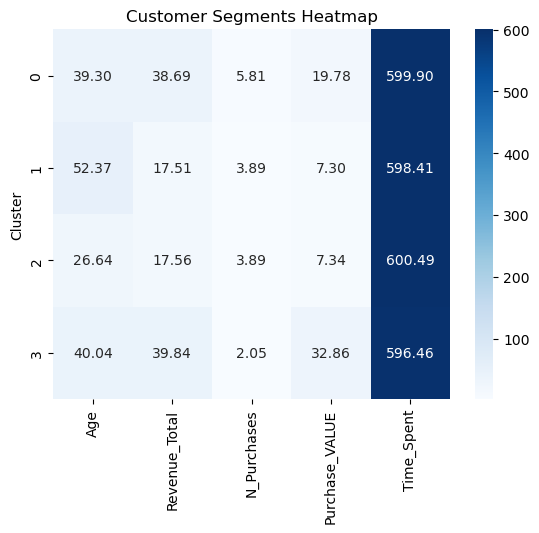

In [12]:
#Visualize the demographic result

# Group data by cluster and calculate mean values for relevant columns
cluster_means = online_sales_data.groupby('Cluster')[['Age', 'Revenue_Total', 'N_Purchases', 'Purchase_VALUE', 'Time_Spent']].mean()

# Generate heatmap
sns.heatmap(cluster_means, cmap='Blues', annot=True, fmt='.2f')

# Set plot title
plt.title('Customer Segments Heatmap')

# Show plot
plt.show()


In [29]:
online_sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Cluster
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Unsubscribed,Not Used,3
1,504309,18,Female,36.2,3,2021-10-12,2.896,Paypal,656,Chrome,Unsubscribed,Used,2
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,1
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used,3
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used,3


#### Find out the most common way customer make payment

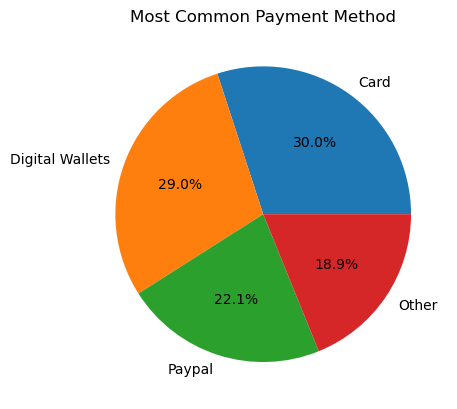

In [13]:
# Use groupby() to group the data by payment method and count the occurrences
payment_counts = online_sales_data.groupby('Pay_Method')['Customer_id'].count().reset_index()

# Sort the payment methods by count in descending order
payment_counts = payment_counts.sort_values(by='Customer_id', ascending=False)

# Plot the results as a pie chart
plt.pie(payment_counts['Customer_id'], labels=payment_counts['Pay_Method'], autopct='%1.1f%%')
plt.title('Most Common Payment Method')
plt.show()

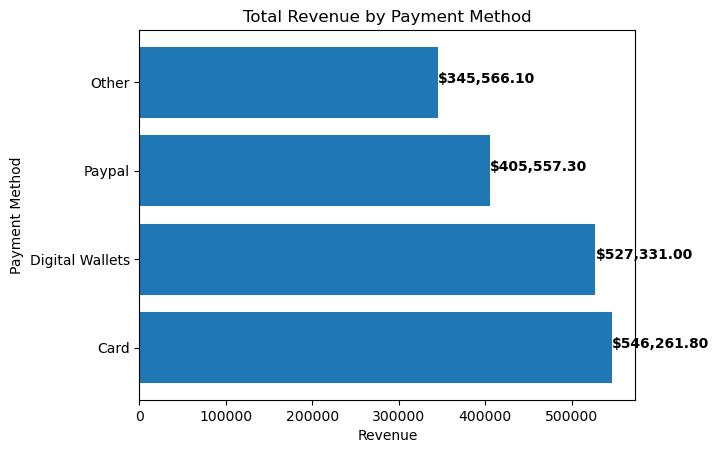

In [26]:

# Group the data by payment method and calculate the total revenue
payment_revenue = online_sales_data.groupby('Pay_Method')['Revenue_Total'].sum()

# Sort the payment methods by total revenue in descending order
payment_revenue = payment_revenue.sort_values(ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(payment_revenue.index, payment_revenue.values)

# Add labels to the bars
for i, v in enumerate(payment_revenue.values):
    ax.text(v, i, '${:,.2f}'.format(v), color='black', fontweight='bold')

# Set axis labels and title
ax.set_xlabel('Revenue')
ax.set_ylabel('Payment Method')
ax.set_title('Total Revenue by Payment Method')

# Show the plot
plt.show()


#### Analyze Purchase Behavior to find out What Month did people make the highest of purchase in other to plan marketing campaign

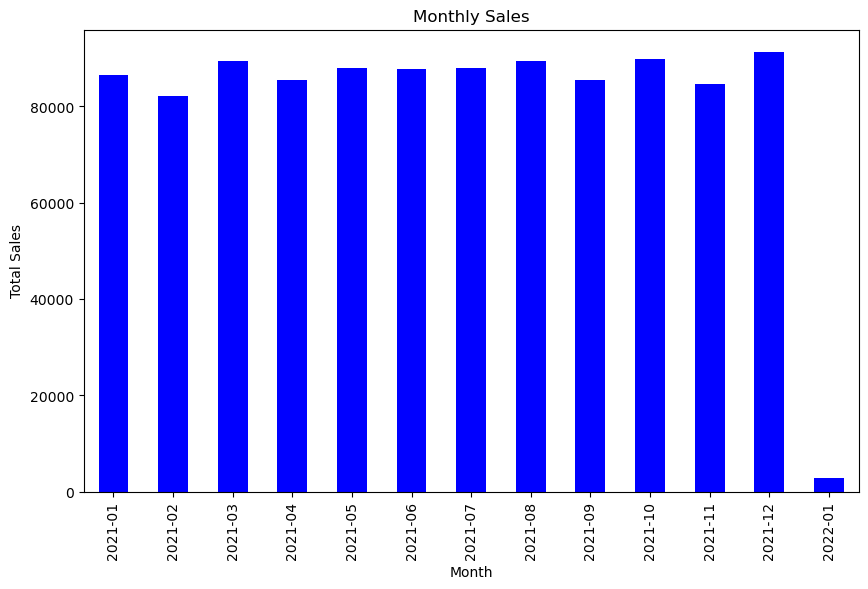

In [29]:
# Extract the month and year from the purchase date column
online_sales_data['purchase_month'] = online_sales_data['Purchase_DATE'].dt.to_period('M')

# Group the data by purchase month and calculate the total purchase value
monthly_sales = online_sales_data.groupby('purchase_month')['Purchase_VALUE'].sum()

# Plot the monthly sales data
monthly_sales.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_23252\3124874615.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  monthly_sales['purchase_month'] = monthly_sales['purchase_month'].apply(lambda x: pd.datetime(2021, x, 1).strftime('%B'))


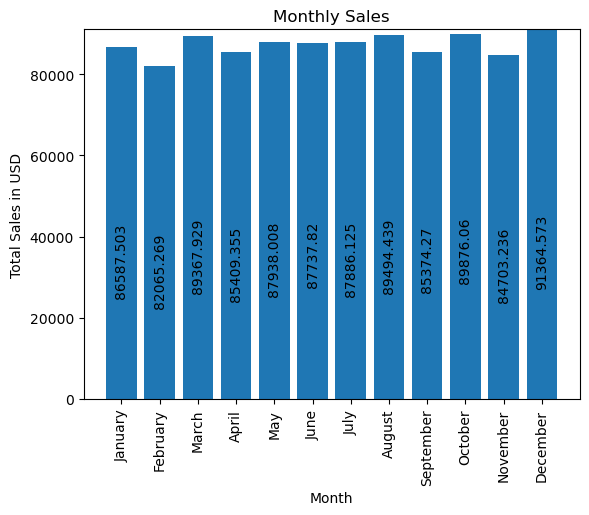

In [48]:
# extract the purchase month and year as separate columns
online_sales_data['purchase_month'] = online_sales_data['Purchase_DATE'].dt.month
online_sales_data['purchase_year'] = online_sales_data['Purchase_DATE'].dt.year

# group the data by purchase month and year and calculate the total purchase value
monthly_sales = online_sales_data.groupby(['purchase_year', 'purchase_month'])['Purchase_VALUE'].sum().reset_index()

# filter out January 2022
monthly_sales = monthly_sales[~((monthly_sales['purchase_year'] == 2022) & (monthly_sales['purchase_month'] == 1))]

# use the strftime method to format the purchase month column as month names
monthly_sales['purchase_month'] = monthly_sales['purchase_month'].apply(lambda x: pd.datetime(2021, x, 1).strftime('%B'))

# set the bar width to 0.8 to create space between the bars
bar_width = 5.0

# plot the monthly sales data
plt.bar(monthly_sales['purchase_month'], monthly_sales['Purchase_VALUE'])
plt.xticks(rotation=90)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD')

# add text labels to the bars
for i, v in enumerate(monthly_sales['Purchase_VALUE']):
    plt.text(i, v/2, str(v), ha='center', va='top', rotation=90)

# set the y-axis limits to 0 and the maximum sales value rounded up to the nearest thousand
max_sales = round(monthly_sales['Purchase_VALUE'].max() / 1000) * 1000
plt.ylim(0, max_sales)
    
plt.show()

#### From the above analysis December has the highest sales. This could be as a result of festive period of Christmas. Also October, August is high as well and advert campaing could be schedule using this months to increase the sales

#### Analyze the gender with the highest purchase value

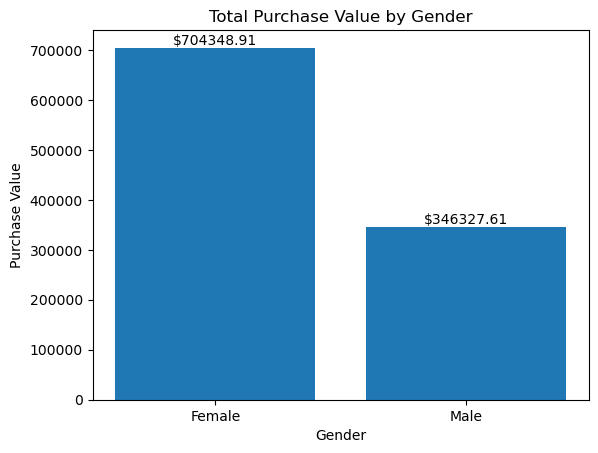

In [50]:

# Group the data by gender and calculate the total purchase value for each gender
purchase_by_gender = online_sales_data.groupby("Gender")["Purchase_VALUE"].sum()

# Create a bar chart to show the results
plt.bar(purchase_by_gender.index, purchase_by_gender.values)

# Add text annotations to show the purchase value on each bar
for i, v in enumerate(purchase_by_gender.values):
    plt.text(i, v, f"${v:.2f}", ha="center", va="bottom")
    
# Set the chart title and axis labels
plt.title("Total Purchase Value by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Value")

# Display the chart
plt.show()


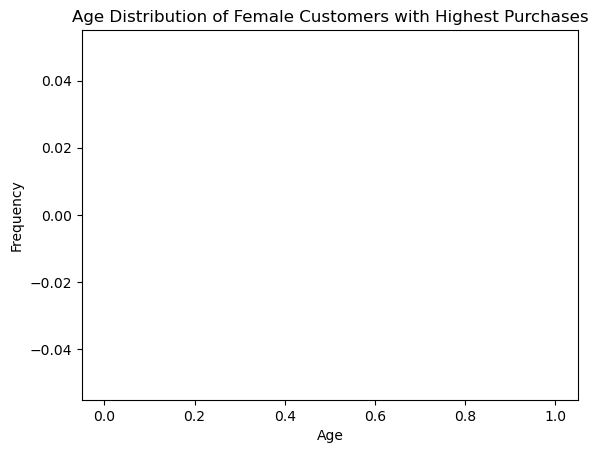

In [53]:
####Visualize the average age of Female with the highest purchase value


# Group the data by gender and calculate the total purchase value for each female customer
female_purchases = online_sales_data[online_sales_data["Gender"] == "F"].groupby("Customer_id")["Purchase_VALUE"].sum()

# Sort the results in descending order to get the female customers who have made the highest purchases
highest_female_purchases = female_purchases.sort_values(ascending=False).head()

# Extract the age data for those customers and calculate the average age
avg_female_age = online_sales_data[online_sales_data["Customer_id"].isin(highest_female_purchases.index)]["Age"].mean()

# Create a histogram to visualize the distribution of ages for those customers
plt.hist(online_sales_data[online_sales_data["Customer_id"].isin(highest_female_purchases.index)]["Age"])

# Add a vertical line to show the average age
plt.axvline(x=avg_female_age, color="red", linestyle="--")

# Set the chart title and axis labels
plt.title("Age Distribution of Female Customers with Highest Purchases")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the chart
plt.show()


In [52]:
online_sales_data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Cluster,purchase_month,purchase_year
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Unsubscribed,Not Used,3,6,2021
1,504309,18,Female,36.2,3,2021-10-12,2.896,Paypal,656,Chrome,Unsubscribed,Used,2,10,2021
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,1,3,2021
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used,3,10,2021
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used,3,9,2021
